In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lats, lngs)
lat_lng
coordinates = list(lat_lng)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
URL = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval   
---------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = URL + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. skipping...")
        pass
# Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | hillsboro
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. skipping...
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | benguela
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | thunder bay
Processing Record 13 of Set 1 | tupik
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | santa maria da vitoria
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | taolanaro
City not found. skipping...
Processing Record 21 of Set 1 | colares
Processing Record 22 of Set 1 | skvyra
Processing Record 23 o

Processing Record 36 of Set 4 | simoes
Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | rio gallegos
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | zhovti vody
Processing Record 42 of Set 4 | lufilufi
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | roald
Processing Record 46 of Set 4 | sao miguel do araguaia
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | shelopugino
Processing Record 49 of Set 4 | tubruq
City not found. skipping...
Processing Record 50 of Set 4 | tocopilla
Processing Record 1 of Set 5 | bud
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | loten
Processing Record 4 of Set 5 | marcona
City not found. skipping...
Processing Record 5 of Set 5 | almeirim
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | lusaka
Processing Record 8 of Set 5 | panjab
Pro

Processing Record 28 of Set 8 | nabire
Processing Record 29 of Set 8 | mahebourg
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | upata
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | jingdezhen
Processing Record 35 of Set 8 | sovetskiy
Processing Record 36 of Set 8 | omboue
Processing Record 37 of Set 8 | saleaula
City not found. skipping...
Processing Record 38 of Set 8 | raga
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | hammerfest
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | kamloops
Processing Record 44 of Set 8 | kungurtug
Processing Record 45 of Set 8 | laurel
Processing Record 46 of Set 8 | rakhya
City not found. skipping...
Processing Record 47 of Set 8 | salinas
Processing Record 48 of Set 8 | sangar
Processing Record 49 of Set 8 | fukue
Processing Record 50 of Set 8 | rio grande
Processing Rec

Processing Record 16 of Set 12 | dogondoutchi
Processing Record 17 of Set 12 | chimbote
Processing Record 18 of Set 12 | la libertad
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | deniliquin
Processing Record 21 of Set 12 | moerai
Processing Record 22 of Set 12 | batagay-alyta
Processing Record 23 of Set 12 | komagane
Processing Record 24 of Set 12 | mpongwe
Processing Record 25 of Set 12 | manzhouli
Processing Record 26 of Set 12 | katsiveli
City not found. skipping...
Processing Record 27 of Set 12 | akdepe
Processing Record 28 of Set 12 | srandakan
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | dingli
Processing Record 31 of Set 12 | kansanshi
Processing Record 32 of Set 12 | bowen
Processing Record 33 of Set 12 | souillac
Processing Record 34 of Set 12 | padilla
Processing Record 35 of Set 12 | mnogovershinnyy
Processing Record 36 of Set 12 | wynyard
Processing Record 37 of Set 12 | santa rosalia
Processing Record 38 of Set 12 | m

In [8]:
len(city_data)

552

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,64.42,48,0,12.66,AR,2022-09-24 13:41:25
1,Hillsboro,45.5229,-122.9898,55.87,86,20,0.00,US,2022-09-24 13:45:19
2,Mataura,-46.1927,168.8643,49.48,98,100,3.76,NZ,2022-09-24 13:46:05
3,Kaitangata,-46.2817,169.8464,47.57,96,100,9.51,NZ,2022-09-24 13:46:06
4,Carnarvon,-24.8667,113.6333,66.20,74,0,25.28,AU,2022-09-24 13:46:06
5,Saint George,37.1041,-113.5841,61.39,44,0,0.00,US,2022-09-24 13:45:26
6,Albany,42.6001,-73.9662,53.56,62,0,1.99,US,2022-09-24 13:46:07
7,Kapaa,22.0752,-159.3190,79.12,83,20,11.50,US,2022-09-24 13:46:07
8,Benguela,-12.5763,13.4055,75.02,71,35,9.13,AO,2022-09-24 13:46:08
9,Ribeira Grande,38.5167,-28.7000,72.00,83,75,29.93,PT,2022-09-24 13:46:08


In [10]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

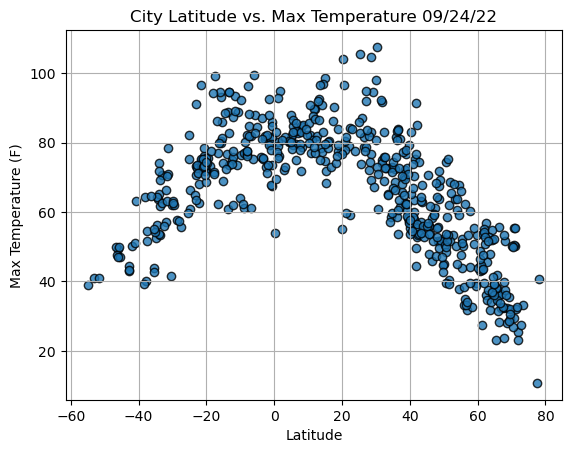

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

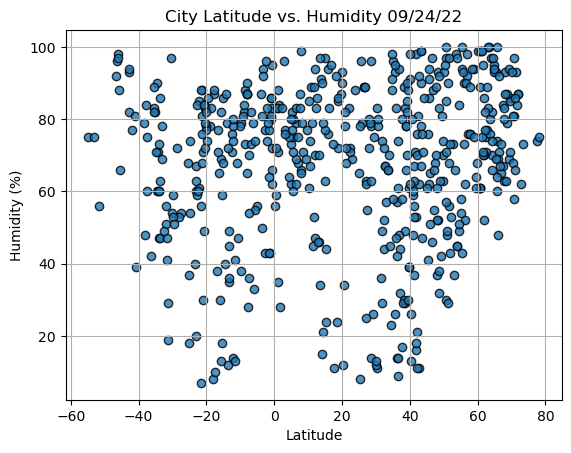

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

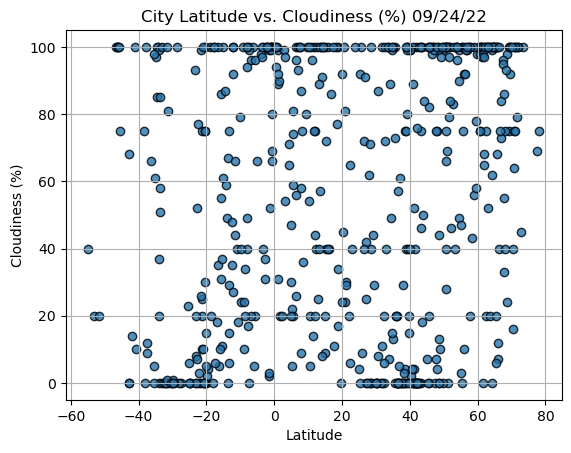

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show Plot
plt.show()

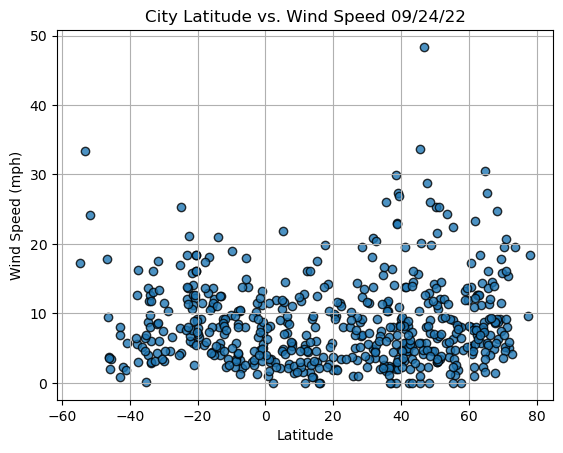

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show Plot
plt.show()

In [47]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_values, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City          Santa Maria Da Vitoria
Country                           BR
Date             2022-09-24 13:46:10
Lat                         -13.3947
lng                         -44.1886
Max Temp                        94.6
Humidity                          35
Cloudiness                         6
Wind Speed                      5.77
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hillsboro,US,2022-09-24 13:45:19,45.5229,-122.9898,55.87,86,20,0.00
5,Saint George,US,2022-09-24 13:45:26,37.1041,-113.5841,61.39,44,0,0.00
6,Albany,US,2022-09-24 13:46:07,42.6001,-73.9662,53.56,62,0,1.99
7,Kapaa,US,2022-09-24 13:46:07,22.0752,-159.3190,79.12,83,20,11.50
9,Ribeira Grande,PT,2022-09-24 13:46:08,38.5167,-28.7000,72.00,83,75,29.93


In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

1      45.5229
5      37.1041
6      42.6001
7      22.0752
9      38.5167
        ...   
547    48.6814
548    47.6666
549     6.4965
550     4.8845
551    13.0349
Name: Lat, Length: 377, dtype: float64

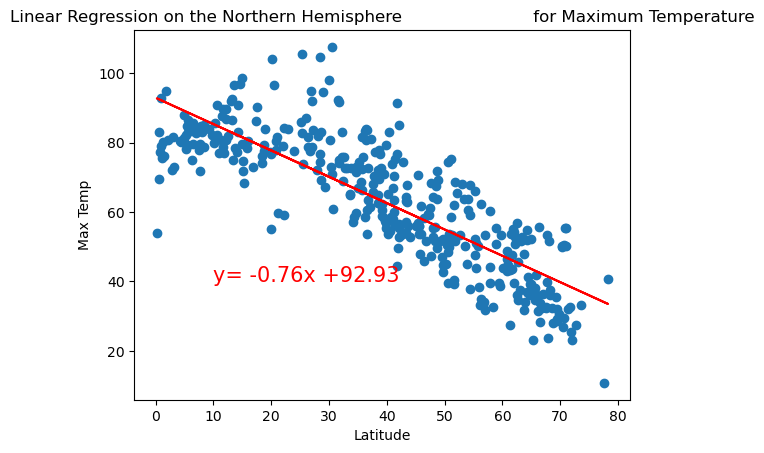

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

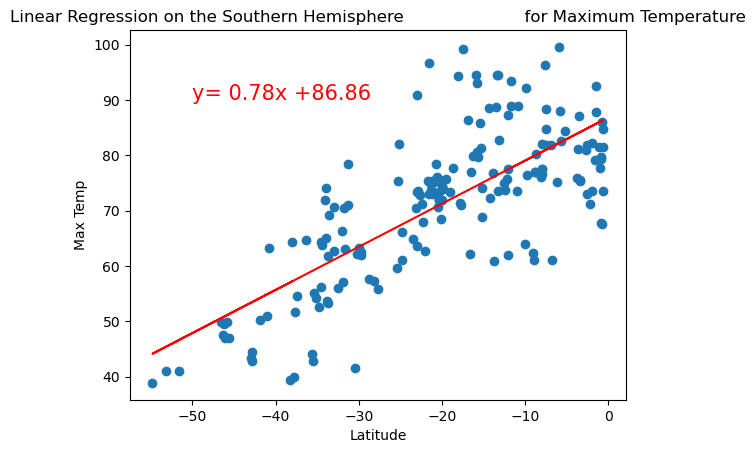

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

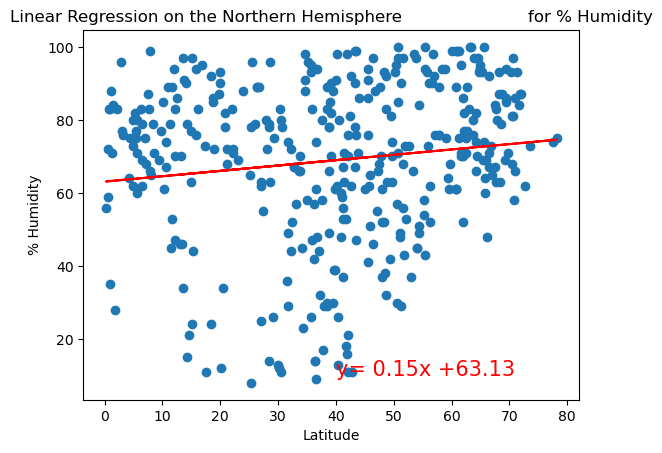

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity', (40,10))

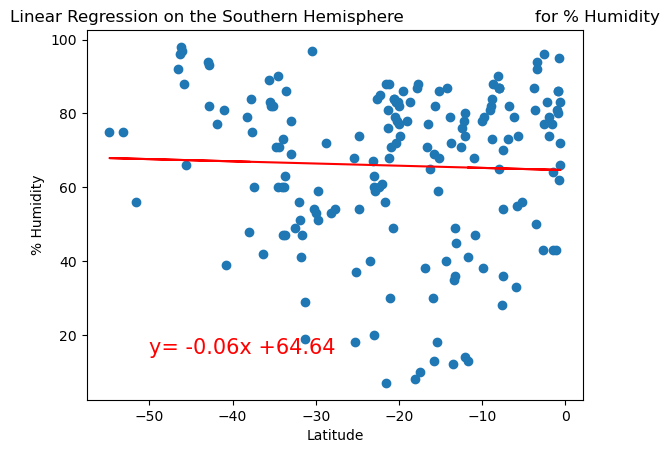

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

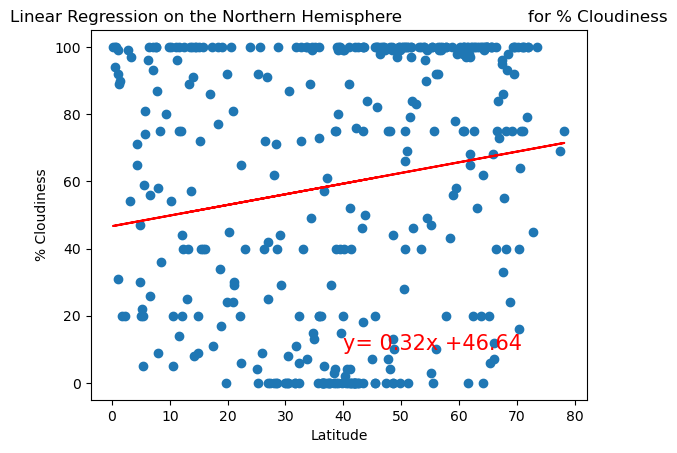

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness', (40,10))

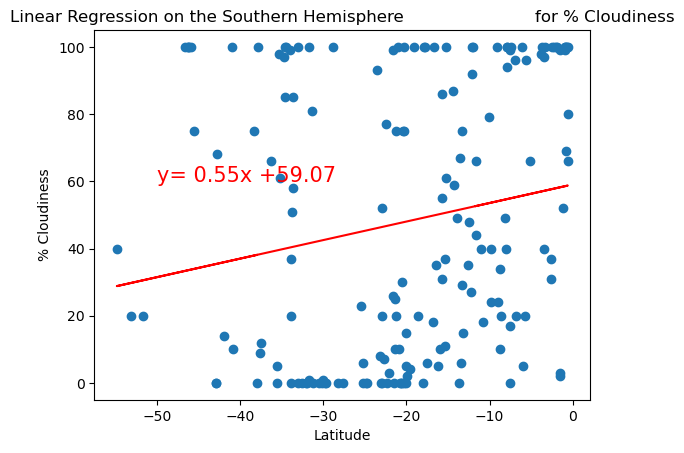

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

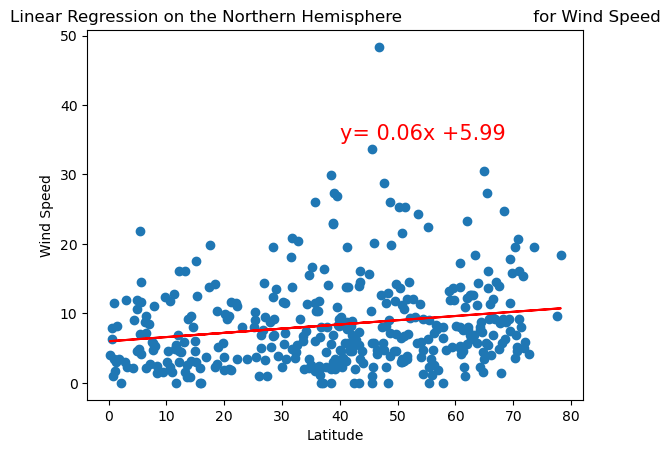

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

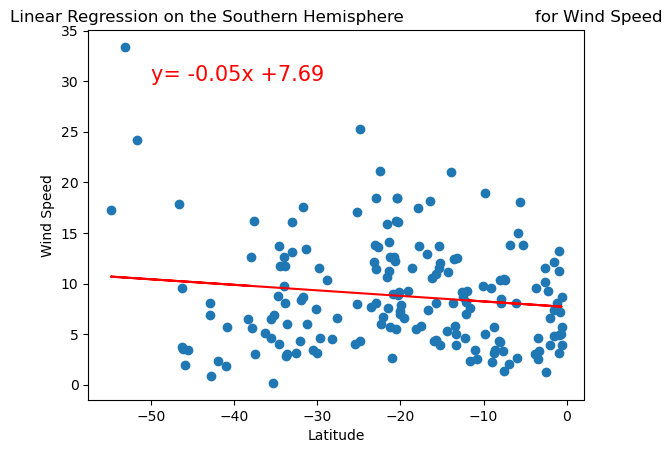

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))